# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [ ]:
Mice treated with either Capomulin or Ramicane regimen have smaller final tumor volume, compared to those treated with either Infubinol or Ceftamin regimen.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
m = pd.read_csv(mouse_metadata_path)
s = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(s, m, on="Mouse ID", how="left")


In [2]:

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
len(s)

1893

In [4]:
df.info

<bound method DataFrame.info of      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   
1890     p438         45           61.433892                 1     Ceftamin   
1891     x773         45           58.634971                 4      Placebo   
1892     b879         45           72.555239                 2     Stelasyn   

         Sex  Age_m

In [5]:
# Checking the number of mice.
df['Mouse ID'].nunique()

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False),'Mouse ID'].unique()

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
df = df[df['Mouse ID'] != 'g989']

In [7]:
df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df2 = df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

In [9]:
df2['Mouse ID'].value_counts()

Mouse ID
b128    10
p136    10
s337    10
q511    10
o926    10
        ..
x336     1
h428     1
o848     1
b447     1
v199     1
Name: count, Length: 249, dtype: int64

In [10]:
df['Mouse ID'].value_counts().nlargest(25)

Mouse ID
g989    13
b128    10
q787    10
s337    10
q511    10
o926    10
a401    10
w350    10
c302    10
a897    10
a262    10
p136    10
c766    10
e227    10
c282    10
o795    10
y478    10
x773    10
t718    10
c757    10
c559    10
j365    10
z795    10
w575    10
e213    10
Name: count, dtype: int64

In [11]:
# Checking the number of mice in the clean DataFrame.
df['Mouse ID'].nunique()

249

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)


# Using the aggregation method, produce the same summary statistics in a single line
df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Data Points for Each Drug Regimen')

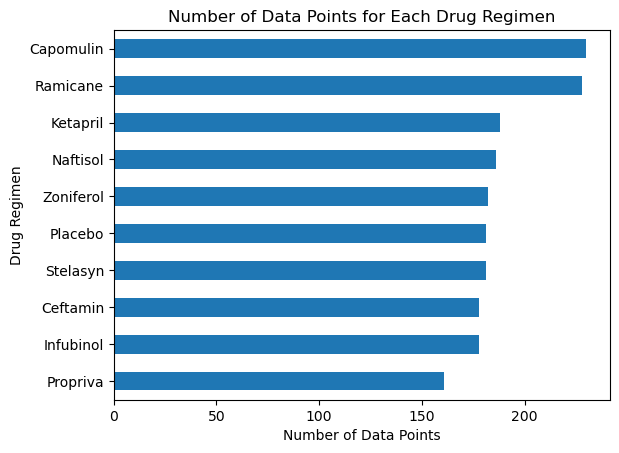

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
df['Drug Regimen'].value_counts().sort_values().plot(kind='barh')
plt.xlabel('Number of Data Points')
plt.ylabel('Drug Regimen')
plt.title('Number of Data Points for Each Drug Regimen')

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts = df['Drug Regimen'].value_counts()


In [16]:
counts.values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 161], dtype=int64)

Text(0, 0.5, 'Drug Regimen')

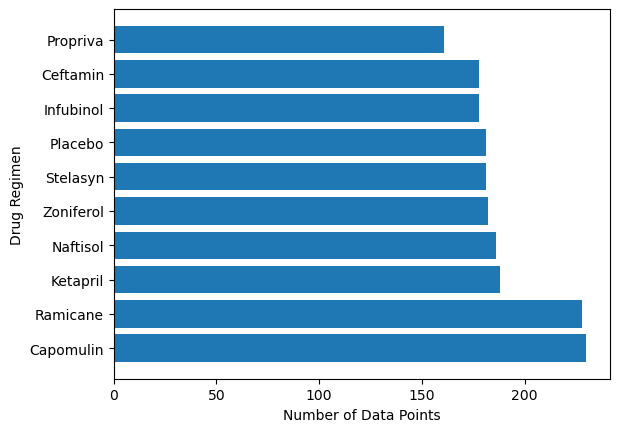

In [17]:
labels = counts.index.to_list()
plt.barh(counts.index, counts.values)
plt.xlabel('Number of Data Points')
plt.ylabel('Drug Regimen')

<Axes: ylabel='count'>

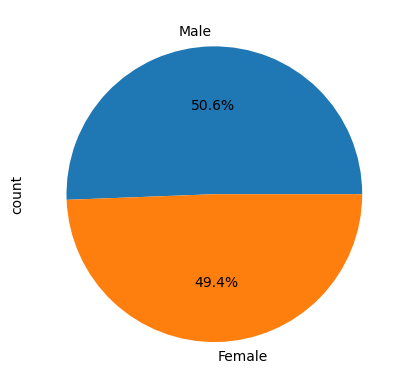

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = df.Sex.value_counts()
counts.plot.pie(autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x1a6f1620fd0>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')],
 [Text(-0.01145045643959205, 0.5998907292560246, '50.6%'),
  Text(0.011450456439592244, -0.5998907292560246, '49.4%')])

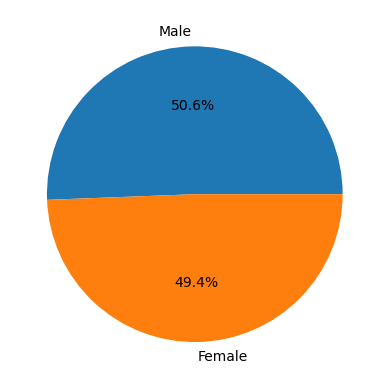

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = df.groupby(['Mouse ID'],as_index=False)['Timepoint'].max()
max_tumor


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
244,z435,10
245,z578,45
246,z581,45
247,z795,45


In [21]:
df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [37]:
 max_tumor = df2.groupby(["Mouse ID"])['Timepoint'].max()


max_tumor = max_tumor.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
pd.merge(df, max_tumor, on=('Mouse ID', 'Timepoint'), how='left')

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [23]:
m

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [28]:
print(m.columns)

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')


In [44]:
# Put treatments into a list for the for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = df2.loc[df2["Drug Regimen"] == drug, 'Tumor Volume (mm3)']

    # add subset 
    tumor_vol_list.append(final_tumor_vol)

    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    iqr = quartiles[0.75] - quartiles[0.25]
    lower_bound = quartiles[0.25] - 1.5 * iqr
    upper_bound = quartiles[0.75] + 1.5 * iqr

    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug} outliers: {outliers}")



Capomulin outliers: 1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane outliers: 1814    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


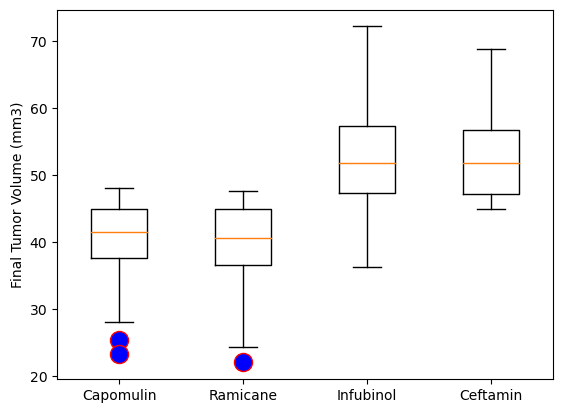

In [49]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
boxy = dict(marker='o', markerfacecolor='b', markersize=13, linestyle='none', markeredgecolor='r')
plt.boxplot(tumor_vol_list, labels=treatment_list, flierprops=boxy)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

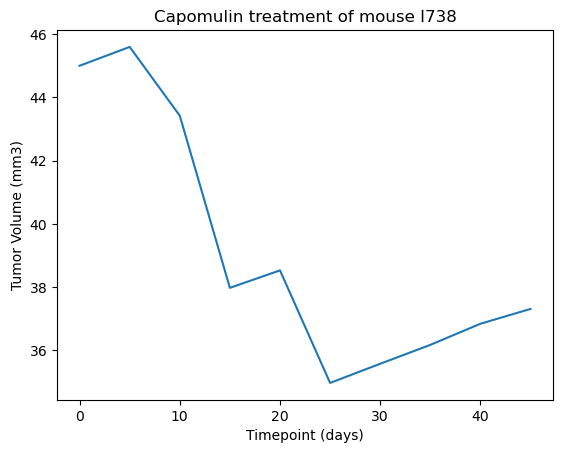

In [51]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin=df2.loc[df2["Mouse ID"]=="i738"][["Timepoint","Tumor Volume (mm3)"]]
plt.plot(capomulin["Timepoint"],capomulin["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse I738")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

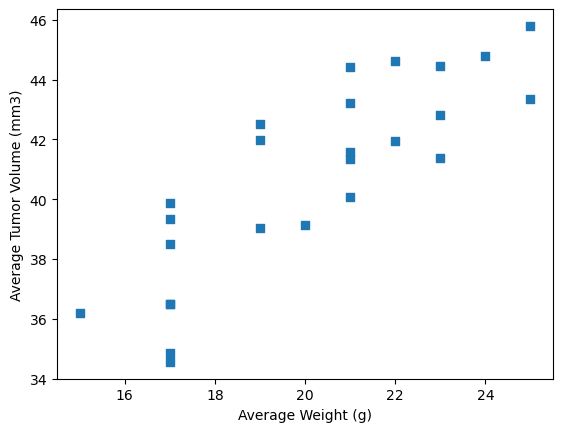

In [53]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
filtered=df2[df2["Drug Regimen"]=="Capomulin"]
capvolmean=filtered.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
capweightmean=filtered.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(capweightmean,capvolmean,marker='s')
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show


## Correlation and Regression

The correlation between mouse weight and average tumor volume in the Capomulin group is 0.7088568047708723


<function matplotlib.pyplot.show(close=None, block=None)>

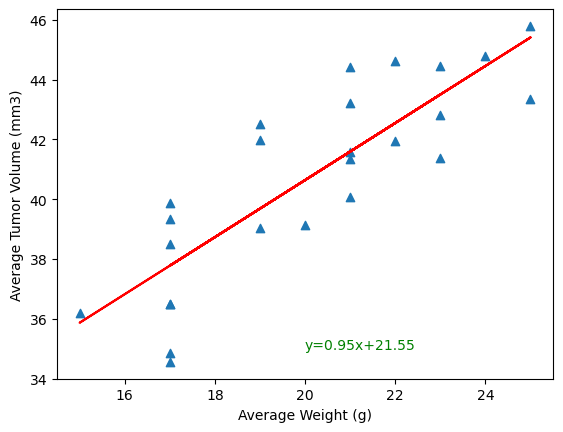

In [54]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stdder) = st.linregress(capweightmean, capvolmean)
regression=intercept+slope*(capweightmean)
line="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(capweightmean, capvolmean, marker="^")
plt.plot(capweightmean, regression, "r-")
plt.annotate(f"y={round(slope,2)}x+{round(intercept,2)}",(20,35),color="green")
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and average tumor volume in the Capomulin group is {rvalue**2}")
plt.show